In [1]:
'''
Name : Peter Sunny Shanthveer Markappa
Student Number: R00208303
Assignemnt : 01
Subject: Deep Learning
Submission Date: 03- April - 2022
'''
# mini batch

'\nName : Peter Sunny Shanthveer Markappa\nStudent Number: R00208303\nAssignemnt : 01\nSubject: Deep Learning\nSubmission Date: 03- April - 2022\n'

In [ ]:
import tensorflow as tf
print(tf.__version__)

from keras.utils import np_utils
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
import tensorflow as tf
from numpy import exp
import numpy as np


2.8.0


In [ ]:
from operator import concat

def softmax(vector):
    e = tf.exp(vector, name ='exp')
    return e / tf.math.reduce_sum(e, axis=None, keepdims=1, name=None)


def forward_pass(x, w1, b1, w2, b2, w3, b3):
    # We need to mutliply each training example by the weights and add bias
    y_pred = tf.matmul(x, tf.transpose(w1)) + b1

    relu_res = tf.keras.activations.relu(y_pred)
    # print("relu_res = ", relu_res.shape)

    # --------- Drop out layer ----------
    probThreshold = 1 - 0.5
    neuronsize = relu_res.shape[0]
    trainingsize = relu_res.shape[1]

    dropmatrix = tf.cast(tf.Variable(tf.random.uniform([neuronsize, trainingsize], dtype=tf.dtypes.float64)) < probThreshold, tf.float64)
    relu_res = relu_res * dropmatrix
    # --------- Drop out layer

    y_pred1 = tf.matmul(relu_res, tf.transpose(w2)) + b2
    relu_res1 = tf.keras.activations.relu(y_pred1)
    # print("relu_res1 = ", relu_res1.shape)


    y_pred2 = tf.matmul(relu_res1,tf.transpose(w3)) + b3
    act = softmax(y_pred2)
    # act = tf.keras.activations.softmax(y_pred1)
    
    return act


def calculate_accuracy(y_pred, tr_y):
    # Round the predictions by the logistical unit to either 1 or 0
    predictions = tf.round(y_pred)
    
    # tf.equal will return a boolean array: True if prediction correct, False otherwise
    # tf.cast converts the resulting boolean array to a numerical array 
    # 1 if True (correct prediction), 0 if False (incorrect prediction)
    predictions_correct = tf.cast(tf.equal(tf.transpose(predictions), tr_y), tf.dtypes.float64)
    
    # Finally, we just determine the mean value of predictions_correct
    accuracy = tf.reduce_mean(predictions_correct)
    
    return accuracy


def cross_entropy(tr_y, y_pred):
    return (- 1 / tr_y.shape[0]) * tf.math.reduce_sum(tr_y * tf.math.log(y_pred) + (1 - tr_y) * (tf.math.log(1 - y_pred)))



def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0

#     print( "Shape of training features ", tr_x.shape) 
#     print( "Shape of test features ", te_x.shape) 


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T
#     print ("Shape of training labels after transpose ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
#     print ("Shape of testing labels after transpose ", te_y.shape)
    
    
      # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    
    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam()
#     cross_entropy = tf.keras.losses.categorical_crossentropy()
    
    
    # #  X_digits, y_digits = loadData()    
    # tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    # tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)

    #  X_digits, y_digits = loadData()     

    w1 = tf.Variable(tf.random.normal( [300, 784] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([300], dtype=tf.dtypes.float64))   

    w2 = tf.Variable(tf.random.normal([100, 300] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([100], dtype=tf.dtypes.float64))

    w3 = tf.Variable(tf.random.normal([10, 100] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b3 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))


    # Concatenate the training data and its labels before splitting
    transpose_y = tr_y.T
    feature_x_y = np.concatenate((tr_x, transpose_y), axis=1)
    print(feature_x_y.shape)

    batch_size = 10

    shuffl_data = np.random.shuffle(feature_x_y)
    each_batch = feature_x_y.shape[0] / batch_size
    print("Each Batch Size", each_batch)

    # Iterate our training loop
    for i in range(num_Iterations):
      
      for j in range(batch_size):
        batch_data = feature_x_y[j*int(each_batch) : (j* int(each_batch)) + int(each_batch), :]
        train_x = batch_data [ : , : 784]
        train_y = batch_data [ : , 784:]

        train_x = tf.convert_to_tensor(train_x, tf.dtypes.float64)
        train_y = tf.convert_to_tensor(train_y, tf.dtypes.float64)

        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c

        with tf.GradientTape() as tape:
            # y_pred = forward_pass(tr_x, w1, b1, w2, b2)
            y_pred = forward_pass(train_x, w1, b1, w2, b2, w3, b3)

            currentLoss = cross_entropy(train_y, y_pred)
            # print("Current Loss", currentLoss)
            trainingLoss.append(currentLoss)
        
        gradients = tape.gradient(currentLoss, [w1, b1, w2, b2, w3, b3])

        accuracy = calculate_accuracy(y_pred, tf.transpose(train_y))

        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2, w3, b3]))
        
        if i % 50 == 0:
          print ("Iteration ", i, ": Loss = ",currentLoss.numpy(), "  Acc: ", accuracy.numpy())

    y_pred = forward_pass(te_x, w1, b1, w2, b2, w3, b3)
    currentLoss = cross_entropy(te_y, tf.transpose(y_pred))
    test_accuracy = calculate_accuracy(y_pred, te_y) 
    print ("Test Accuracy : ", test_accuracy.numpy())

    
    # plt.plot(validationLoss, label="Val Loss")
    # plt.show()

    # plt.plot(validationAccuracies, label="Val Acc")
    # plt.show()

    plt.plot(trainingLoss, label="Train Loss")
    plt.plot(trainingAccuracies, label="Train Acc")
    plt.show()

    plt.legend()




(60000, 794)
Each Batch Size 6000.0
Iteration  0 : Loss =  11.59743748374064   Acc:  0.9
Iteration  0 : Loss =  11.404590076653733   Acc:  0.9
Iteration  0 : Loss =  11.301386910214626   Acc:  0.9
Iteration  0 : Loss =  11.215093256245135   Acc:  0.9
Iteration  0 : Loss =  11.128400445614261   Acc:  0.9
Iteration  0 : Loss =  11.07504510082249   Acc:  0.9
Iteration  0 : Loss =  11.003306745968683   Acc:  0.9
Iteration  0 : Loss =  10.986884374212126   Acc:  0.9
Iteration  0 : Loss =  10.93588931925673   Acc:  0.9
Iteration  0 : Loss =  10.897523289297755   Acc:  0.9
Iteration  50 : Loss =  9.05315610300112   Acc:  0.9
Iteration  50 : Loss =  9.045719169997389   Acc:  0.9
Iteration  50 : Loss =  9.04556144928337   Acc:  0.9
Iteration  50 : Loss =  9.046734646499992   Acc:  0.9
Iteration  50 : Loss =  9.073301744820409   Acc:  0.9
Iteration  50 : Loss =  9.062365878545076   Acc:  0.9
Iteration  50 : Loss =  9.044820993566047   Acc:  0.9
Iteration  50 : Loss =  9.056460710004856   Acc:  0

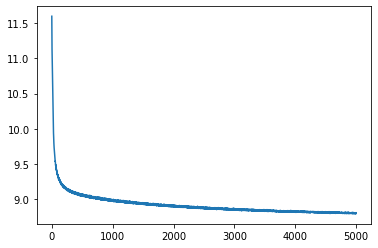

No handles with labels found to put in legend.


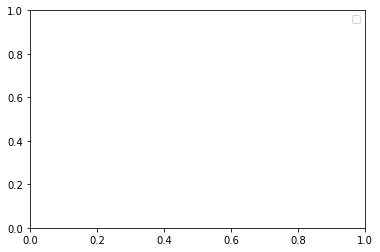

In [ ]:
main()